In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import normalize, to_categorical
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


opt = tf.keras.optimizers.Adam()
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(3, activation="sigmoid"))

model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=["acc"])

history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

Epoch 1/30
39/39 [==============================] - 3s 29ms/step - loss: 0.9398 - acc: 0.7543 - val_loss: 1.3278 - val_acc: 0.3734
Epoch 2/30
39/39 [==============================] - 0s 8ms/step - loss: 0.1455 - acc: 0.9718 - val_loss: 2.0720 - val_acc: 0.3734
Epoch 3/30
39/39 [==============================] - 0s 8ms/step - loss: 0.0232 - acc: 0.9935 - val_loss: 3.1887 - val_acc: 0.3734
Epoch 4/30
39/39 [==============================] - 0s 8ms/step - loss: 0.0074 - acc: 0.9978 - val_loss: 4.1282 - val_acc: 0.3734
Epoch 5/30
39/39 [==============================] - 0s 7ms/step - loss: 0.0107 - acc: 0.9958 - val_loss: 6.1809 - val_acc: 0.3734
Epoch 6/30
39/39 [==============================] - 0s 8ms/step - loss: 0.0240 - acc: 0.9950 - val_loss: 3.6810 - val_acc: 0.3734
Epoch 7/30
39/39 [==============================] - 0s 8ms/step - loss: 0.0064 - acc: 0.9965 - val_loss: 4.6942 - val_acc: 0.3734
Epoch 8/30
39/39 [==============================] - 0s 8ms/step - loss: 9.1328e-04 - acc:

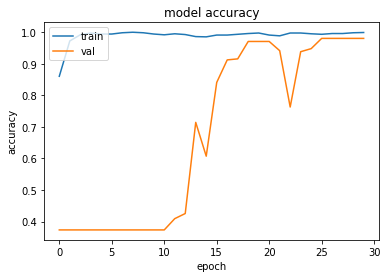

In [2]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

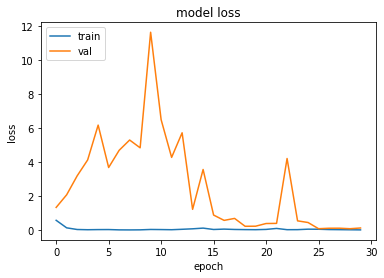

In [3]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [4]:
model.summary()
print(y_train)
print(X_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 58, 58, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 29, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 64)        0